In [1]:
## TIME SERIES FOR BIGNNERS ###


In [2]:
#time Series problem involving prediction of number of commuters of JetRail, a new high speed rail service by Unicorn Investors.
#
#We are provided with 2 years of data(Aug 2012-Sept 2014) and using this data we have to forecast the number of commuters

In [29]:
#Reading the csv file using pandas
import pandas as pd
import numpy as np

In [30]:
data = pd.read_csv("C:/Users/bharghava/Downloads/jetrailTrain.csv")


In [31]:
#Checking the first  values of the  dataset
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [74]:
#Checking the shape of the dataset
data.shape

(18288, 3)

In [33]:
##<< " Splitting the dataset" >>
#Defining the train and test in 80-20 split
train = data[0:14630]
test = data[14630 :]

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14630 entries, 0 to 14629
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        14630 non-null  int64 
 1   Datetime  14630 non-null  object
 2   Count     14630 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 343.0+ KB


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 14630 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        3658 non-null   int64 
 1   Datetime  3658 non-null   object
 2   Count     3658 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 85.9+ KB


In [36]:
#First five values of the train dataset
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [37]:
train.tail()  # last five columns of train data file 

,ID,Datetime,Count
14625,14625,26-04-2014 09:00,154
14626,14626,26-04-2014 10:00,200
14627,14627,26-04-2014 11:00,200
14628,14628,26-04-2014 12:00,228
14629,14629,26-04-2014 13:00,206


In [38]:
test.head()

,ID,Datetime,Count
14630,14630,26-04-2014 14:00,204
14631,14631,26-04-2014 15:00,172
14632,14632,26-04-2014 16:00,184
14633,14633,26-04-2014 17:00,124
14634,14634,26-04-2014 18:00,190


In [39]:
test.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [34]:
## PREPROCESSING DATA
## 1.For the time series problems there are some preprocessing that is important and needs to be done
##2.First is checking whether the datatype of the date column should be in acceptable date format in python,
##if not so we can use to pandas to_datetime to convert it into requiered format
##3.We convert the index to the date column this helps a bigtime for processing in dataset
##4.Now with the time series data we want consistency with the data, it should be either in years,
##months or day there has to be consistency in the data. 
##To deal with this the resample comes handy and it's like creating the missing dates and filling it with some function here i have taken mean value
##Finally we dropped the ID column which serve no purpose
##This all is taken care with the help of function below

In [49]:
#Function to do some processing
def processing(data):
        data.Timestamp = pd.to_datetime(data.Datetime,format='%d-%m-%Y %H:%M') 
        data.index = data.Timestamp 
        data = data.resample('D').mean()
        data.drop('ID',1,inplace = True)
        return data

In [53]:
#Passing through the function
#train = processing(train)
#test =processing(test)
#data = processing(data)### error 

AttributeError: 'DataFrame' object has no attribute 'Datetime'

In [ ]:
###DECOMPOSITION
##Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.
##It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.
##The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). It requires that you specify whether the model is additive or multiplicative.
##The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.
##Multiplicative decomposition is done by dividing the series by the trend values. Next, seasonal factors are estimated using the de-trended series
##There is seasonality in the below data, there is also trend
##The trend is the component of a time series that represents variations of low frequency in a time series, the high and medium frequency fluctuations having been filtered out
##Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal
##The “residuals” in a time series model are what is left over after fitting a model

<Figure size 432x288 with 0 Axes>

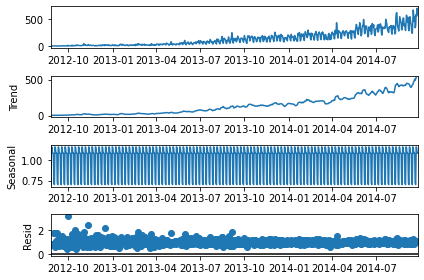

In [58]:
#Ploting the seasonal decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data, model='multiplicative')
fig = plt.figure()
fig = decompose.plot()

In [ ]:
##Stationarity and ADFuller Test
##A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.
##The observations in a stationary time series are not dependent on time.
##Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.
##When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.
##In statistics, the Dickey–Fuller test tests the null hypothesis that a unit root is present in an autoregressive model. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.
###Statsmodels provide a way to the test.
###Below is the function for determining the stationarity


In [63]:
#Deriving the function of Dickey fuller test for checking the stationarity
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series.dropna(),autolag='AIC')
    if result[1] <= 0.05:
        print("Data  is stationary")
    else:
        print("Data  is non-stationary")


In [64]:
adf_test(data["Count"])


Data  is non-stationary


In [67]:
###To make the data stationary, we do the seasonal differencing which is substracting the data next
#Seasonal difference
data["Count diff"] = data["Count"]- data["Count"].shift(12)
data["Count diff"].dropna(inplace=True)
#Checking the stationarity again
adf_test(data["Count diff"])

Data  is stationary


In [ ]:
##ACF and PACF plots
##ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged value
##PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation
##Why do we bother about the plots? it will give us the hyperparametes of time series model for prediction
##You will know what i mean at the end of the notebook

C:\Users\bharghava\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


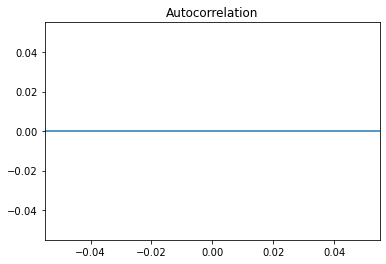

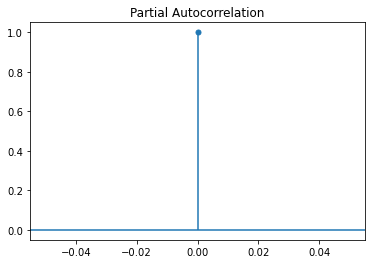

In [68]:
#Auto correlation plot and Partial correlation plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data["Count diff"], lags= 60, alpha=0.05);
plot_pacf(data["Count diff"], lags= 60, alpha=0.05);

<AxesSubplot:title={'center':'Daily Commuters'}, xlabel='Datetime'>

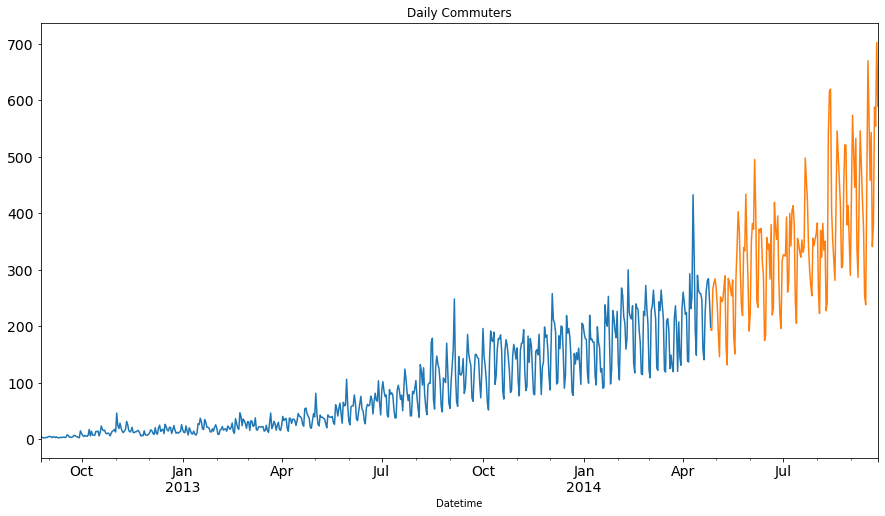

In [69]:
##Visualisation ###EDA
##Let's start with visualising the train and test data and observe how it varies with time
import seaborn as sns
import matplotlib.pyplot as plt
#Plotting data
train.Count.plot(figsize=(15,8), title= 'Daily Commuters', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Commuters', fontsize=14)

Text(0.5, 1.0, 'Naive Forecast')

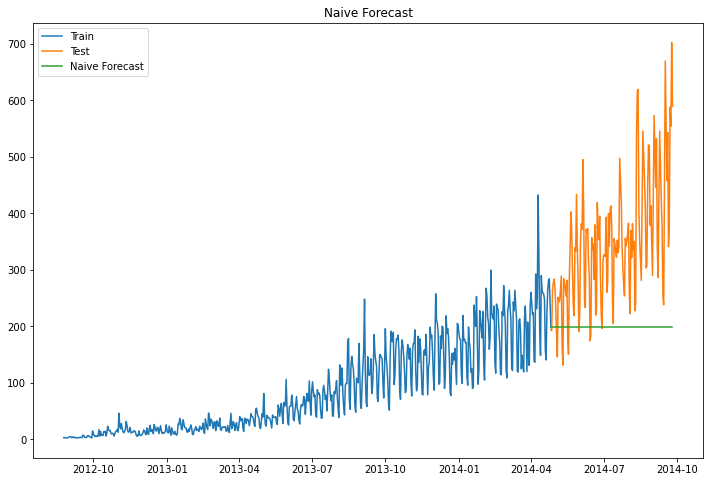

In [78]:
##Models in Time series forecasting

### 1.Naive Approach
##As silly as it sounds,in this approach.
##This simply assumes that the forecast will have the value through the rest of the period.
##Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.
##Code for naive method
import numpy as np
dd= np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")



In [ ]:
##1.We will now calculate RMSE to check to accuracy of our model on test data set.
##2.We can infer from the RMSE value and the graph above, that Naive method isn’t suited for datasets with high variability
##3.Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data


In [82]:
# Root Mean squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print(rms)

187.23754629361167


In [ ]:
##Simple Average
##Forecasting technique which forecasts the expected value equal to the average of all previously observed points is called Simple Average technique.
##Calculate the average and take it as the next value. Of course it won’t be it exact, but somewhat close. As a forecasting method, there are actually situations where this technique works the best.

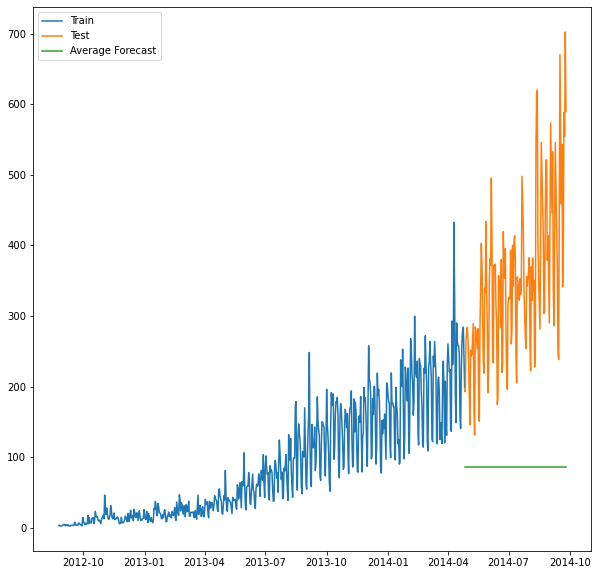

In [90]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(10,10))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [92]:
## ROOT SQUARE METHOD
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print(rms)

284.93304647878404


In [93]:
##Moving Average
##Forecasting technique which uses window of time period for calculating the average is called Moving Average technique.
##Calculation of the moving average involves what is sometimes called a “sliding window” of size n.


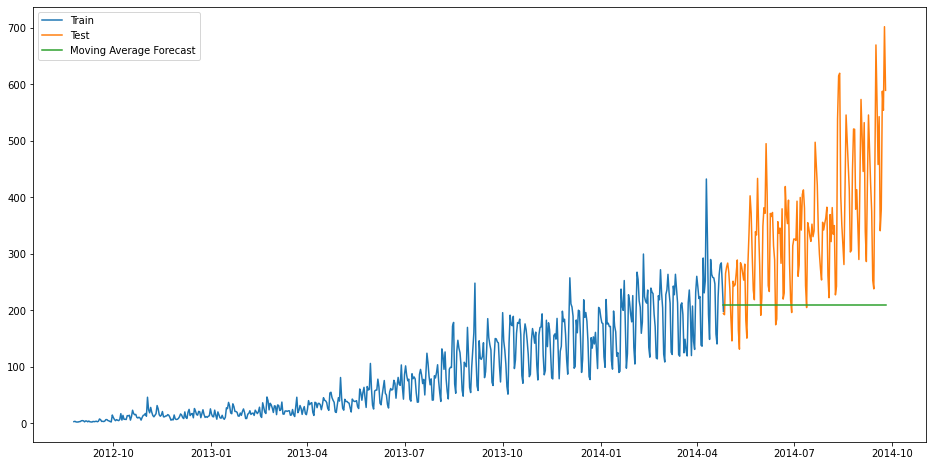

In [94]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [98]:
## Again find the root mean squared error by using moving _avg_forecast
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print(rms)

177.66841787838908


In [ ]:
##Simple Exponential smoothing
##Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations where 0≤ α ≤1 is the smoothing parameter

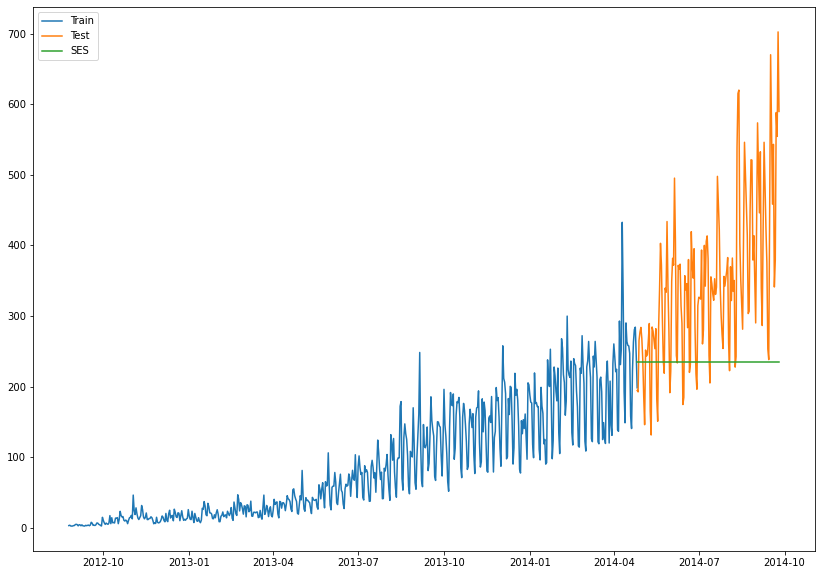

In [107]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.1,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(14,10))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [108]:
## again finding error by using avg of seasonal component
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SES))
print(rms)

159.88667505480927


In [ ]:
##Holt's Linear trend method
#1.Holt extended simple exponential smoothing to allow forecasting of data with a trend.
#2.It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend.
#3.To express this in mathematical notation we now need three equations: one for level, one for the trend and one to combine the level and trend to get the expected forecast ŷ

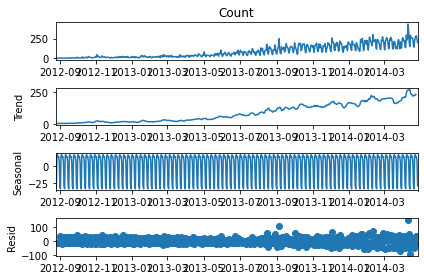

In [111]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)

D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-112-9c049562f7ca>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)


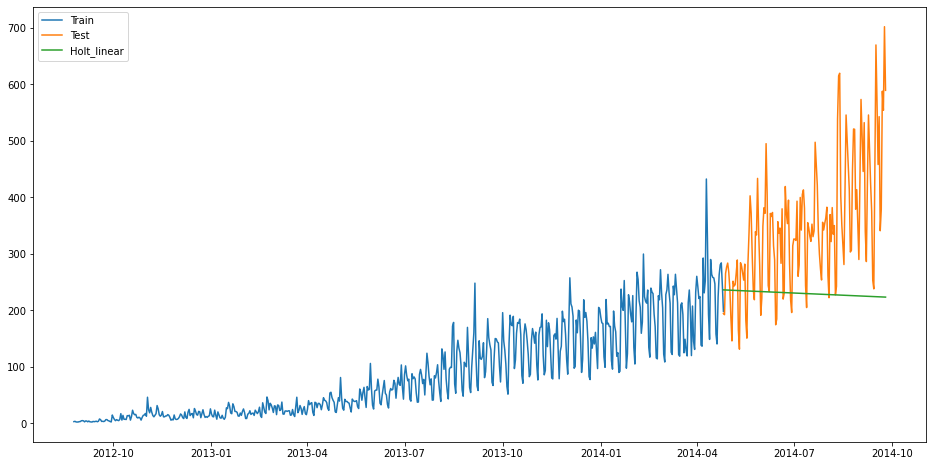

In [112]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))
## PLoting code 
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')



In [ ]:
##Holt's Winter
##The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — one for the level ℓt, one for trend bt and one for the seasonal component denoted by st, with smoothing parameters α, β and γ.

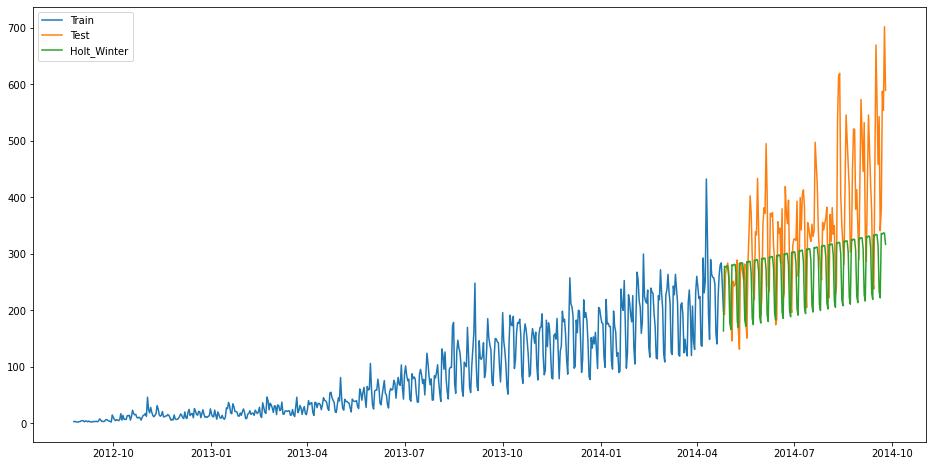

In [113]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')


In [ ]:
### ARIMA
##Another common Time series model that is very popular among the Data scientists is ARIMA. 
##It stand for Autoregressive Integrated Moving average. 
##While exponential smoothing models were based on a description of trend and seasonality in the data,
##ARIMA models aim to describe the correlations in the data with each other.
##An improvement over ARIMA is Seasonal ARIMA. It takes into account the seasonality of dataset just like Holt’ Winter method
##The hyperparameter in the p,d,q and s are taken arbitarily by checking the lags in the ACF and PACF plot.
###I highly encourage you to learn as much as you can about the lag from the plots, it is mostly choosen arbitarily by experience
###Also you should check this Link SARIMAX document


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


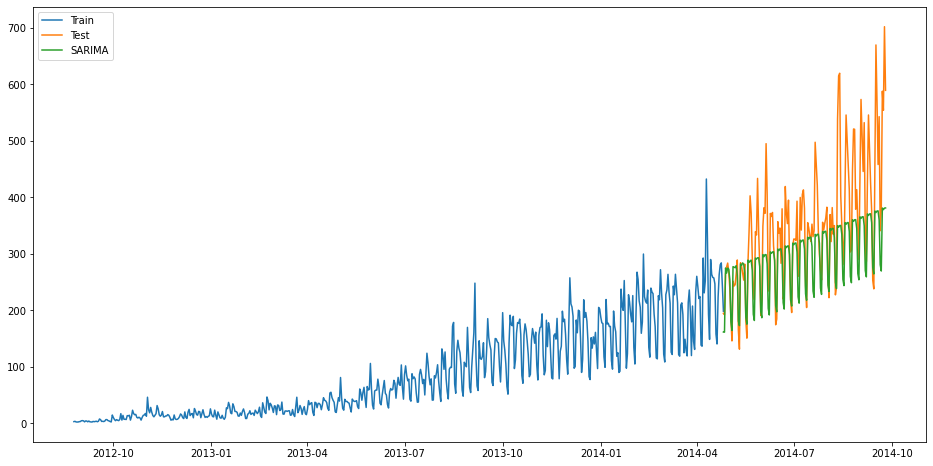

In [121]:
#p- acf plot lag
#q- pacf plot lag
#d- diffencing
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2,1,4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-04-26", end="2014-09-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')

In [ ]:
##Conclusion
##Use these above mentioned techniques in differenct problem statements and see what works for your problem
##Remeber one thing each of these models can outperform others on a particular dataset.
###Therefore it doesn’t mean that one model which performs best on one type of dataset will perform the same for all others too.
###